---
---
# CLASSIFICATIONS MODELS
---
---

* GEREKLİ KÜTÜPHANELER

In [259]:
import numpy                as np
import pandas               as pd
import statsmodels.api      as sm
import seaborn              as sns
import matplotlib.pyplot    as plt
from sklearn.preprocessing      import scale, StandardScaler
from sklearn.model_selection    import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics            import confusion_matrix,accuracy_score,mean_squared_error,r2_score, roc_auc_score,roc_curve,classification_report
from sklearn.linear_model       import LogisticRegression
from sklearn.neighbors          import KNeighborsClassifier
from sklearn.svm                import SVC
from sklearn.neural_network     import MLPClassifier
from sklearn.tree               import DecisionTreeClassifier
from sklearn.ensemble           import RandomForestClassifier
from sklearn.ensemble           import GradientBoostingClassifier
from xgboost                    import XGBClassifier
from lightgbm                   import LGBMClassifier
from catboost                   import CatBoostClassifier

In [260]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### VERİ SETİ HİKAYESİ VE ŞEKER HASTALIĞI TAHMİNİ

In [261]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [262]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [263]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [264]:
Y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [265]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [266]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


---
# LOJİSTİK REGRESYON (LOGISTIC REGRESSION)
---

# MODEL KURMA & MODEL TAHMİN

In [267]:
loj_model = LogisticRegression(solver="liblinear").fit(X,Y)

In [268]:
loj_model.intercept_

array([-5.84073324])

In [269]:
loj_model.coef_

array([[ 1.16937119e-01,  2.82506791e-02, -1.69647463e-02,
         7.64900753e-04, -6.30568264e-04,  5.91967766e-02,
         6.68475894e-01,  7.08845329e-03]])

In [270]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [271]:
Y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [272]:
y_pred = loj_model.predict(X)
confusion_matrix(Y,y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [273]:
accuracy_score(Y, y_pred)

0.7747395833333334

In [274]:
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [275]:
loj_model.predict_proba(X)[0:10]

array([[0.35208919, 0.64791081],
       [0.91613598, 0.08386402],
       [0.22544273, 0.77455727],
       [0.92033572, 0.07966428],
       [0.16985872, 0.83014128],
       [0.79768782, 0.20231218],
       [0.8787278 , 0.1212722 ],
       [0.2764273 , 0.7235727 ],
       [0.32085978, 0.67914022],
       [0.9216265 , 0.0783735 ]])

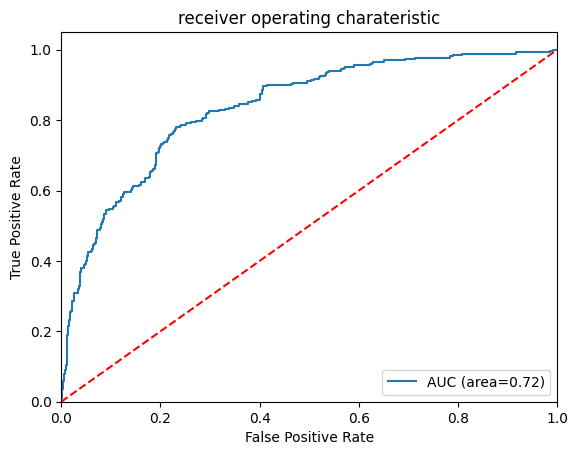

In [276]:
#roc egrisi
logit_roc_auc = roc_auc_score(Y, loj_model.predict(X))
fpr,tpr,thresholds = roc_curve(Y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr,tpr,label="AUC (area=%0.2f)" % logit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("receiver operating charateristic")
plt.legend(loc="lower right")
plt.savefig("Log_ROC")
plt.show()

# MODEL VALIDATION (MODEL DOĞRULAMA)

In [277]:
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.30,
                                                    random_state=42)

In [278]:
loj_cv_model = LogisticRegression(solver="liblinear").fit(X_train,Y_train)

In [279]:
y_pred = loj_cv_model.predict(X_test)

In [280]:
print(accuracy_score(Y_test,y_pred))

0.7532467532467533


In [281]:
cross_val_score(loj_model, X_test, Y_test, cv=10).mean()

0.7748188405797102

---
# LOJİSTİK REGRESYON (LOGISTIC REGRESSION)
---

In [282]:
Y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.30,
                                                    random_state=42)

# MODEL KURMA & MODEL TAHMİN

In [283]:
knn_model = KNeighborsClassifier().fit(X_train,Y_train)
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [284]:
y_pred = knn_model.predict(X_test)
print(accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

0.6883116883116883
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



# MODEL TUNING

In [285]:
knn = KNeighborsClassifier()

knn_params = {"n_neighbors": np.arange(1,50)}

knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train,Y_train)

print(knn_cv_model.best_params_)
print(knn_cv_model.best_score_)

{'n_neighbors': 11}
0.748637316561845


In [286]:
#final
knn_tuned = KNeighborsClassifier(n_neighbors=11).fit(X_train,Y_train)

y_pred = knn_tuned.predict(X_test)
accuracy_score(Y_test,y_pred)

0.7316017316017316

In [287]:
knn_tuned.score(X_test,Y_test)

0.7316017316017316

---
# DESTEK VEKTÖR MAKİNELERİ (SVM)
---

In [288]:
Y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.30,
                                                    random_state=42)

# MODEL KURMA & MODEL TAHMİN

In [289]:
svm_model = SVC(kernel="linear").fit(X_train,Y_train)
svm_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [290]:
y_pred = svm_model.predict(X_test)
print(accuracy_score(Y_test,y_pred))

0.7445887445887446


# MODEL TUNING

In [291]:
svm = SVC().fit(X_train,Y_train)
svm_params = {"C": np.arange(1,10), 
              "kernel":["linear","rbf"]}

svm_cv_model = GridSearchCV(svm, svm_params, cv=5, n_jobs=-1, verbose=2).fit(X_train,Y_train)

print(svm_cv_model.best_params_)
print(svm_cv_model.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'C': 2, 'kernel': 'linear'}
0.7839044652128765


In [292]:
#final
svm_tuned = SVC(C=2,kernel="linear").fit(X_train,Y_train)

y_pred = svm_tuned.predict(X_test)
accuracy_score(Y_test,y_pred)

0.7445887445887446

---
# YAPAY SİNİR AĞLARI 
# (ÇOK KATMANLI ALGILAYICILAR) 
# (DERİN ÖĞRENME) 
# (DEEP LEARNING)
# (NEURAL NETWORK)
---

In [293]:
Y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.30,
                                                    random_state=42)

# MODEL KURMA & MODEL TAHMİN

In [294]:
mlpc_model = MLPClassifier().fit(X_train,Y_train)
mlpc_model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [295]:
mlpc_model.coefs_

[array([[-1.72988150e-01,  1.56736140e-01,  8.38371978e-02,
          4.50222420e-02, -2.56226152e-02, -2.72946633e-01,
         -5.17474010e-03,  7.69182464e-02,  1.85757651e-02,
         -1.94137637e-01,  3.09780116e-01,  8.30831395e-02,
         -1.76397710e-01, -2.05474138e-01,  1.09703262e-01,
         -9.67760649e-02,  5.95299609e-02, -9.08463971e-03,
          2.83296460e-04, -1.20903299e-01, -1.14081454e-01,
          3.58297006e-03, -2.08881969e-02,  1.68282484e-02,
         -6.21746009e-02,  1.13060257e-01, -2.08822746e-01,
          2.09442679e-01,  1.75343903e-01, -1.63277331e-01,
         -1.69299840e-01,  1.17311530e-01, -2.04155047e-03,
         -1.51093801e-03, -1.95413650e-01,  3.02346285e-02,
          1.08149663e-01,  2.30913275e-01, -2.24212584e-01,
         -1.07931462e-01,  1.76986077e-01,  1.60694993e-01,
          1.22123123e-01,  1.02098202e-01,  1.44331765e-01,
         -2.64226082e-02, -1.61745075e-02, -5.75955567e-02,
          1.45525508e-01, -4.11331447e-0

In [296]:
?mlpc_model

Type:        MLPClassifier
String form: MLPClassifier()
File:        c:\users\giray\appdata\local\programs\python\python312\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : 

In [297]:
y_pred = mlpc_model.predict(X_test)
accuracy_score(Y_test,y_pred)

0.70995670995671

# MODEL TUNING

* lbfgs küçük veri setlerin daha iyi çalışır. 

In [298]:
mlpc_model = MLPClassifier(solver="lbfgs").fit(X_train,Y_train)
mlpc_params = {"hidden_layer_sizes": [(10,10),(100,100,100),(100,100),(3,5)],
               "alpha"             :[1,5,0.1,0.01,0.03,0.005,0.0001]}

mlpc_cv_model = GridSearchCV(mlpc_model, mlpc_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,Y_train)

print(mlpc_cv_model.best_params_)
print(mlpc_cv_model.best_score_)

c:\Users\Giray\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Fitting 10 folds for each of 28 candidates, totalling 280 fits
{'alpha': 1, 'hidden_layer_sizes': (3, 5)}
0.7541579315164222


c:\Users\Giray\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [299]:
#final #aktivasyon fonksiyonu: relu
mlpc_tuned = MLPClassifier(alpha               = 5, 
                           hidden_layer_sizes  = (3,5), 
                           solver              = "lbfgs").fit(X_train,Y_train)

y_pred = mlpc_tuned.predict(X_test)
accuracy_score(Y_test,y_pred)

0.6406926406926406

In [300]:
mlpc_model = MLPClassifier(solver="lbfgs", activation ="logistic").fit(X_train,Y_train)
mlpc_params = {"hidden_layer_sizes": [(10,10),(100,100,100),(100,100),(3,5)],
               "alpha"             : [1,5,0.1,0.01,0.03,0.005,0.0001]}

mlpc_cv_model = GridSearchCV(mlpc_model, mlpc_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,Y_train)

print(mlpc_cv_model.best_params_)
print(mlpc_cv_model.best_score_)

c:\Users\Giray\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Fitting 10 folds for each of 28 candidates, totalling 280 fits
{'alpha': 5, 'hidden_layer_sizes': (100, 100)}
0.7450733752620546


c:\Users\Giray\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [301]:
#final #aktivasyon fonksiyonu: logistic
mlpc_tuned = MLPClassifier( alpha              = 5, 
                            hidden_layer_sizes = (100,100), 
                            solver             ="lbfgs",
                            activation         = "logistic").fit(X_train,Y_train)

y_pred = mlpc_tuned.predict(X_test)
accuracy_score(Y_test,y_pred)

c:\Users\Giray\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7229437229437229

In [302]:
# Standartlaştırarak yapmak:

Y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.30,
                                                    random_state=42)
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [303]:
# scale edilmiş veri ile yapay sinir ağları:
mlpc_model = MLPClassifier(solver="lbfgs", activation ="logistic").fit(X_train,Y_train)
mlpc_params = {"hidden_layer_sizes": [(10,10),(100,100,100),(100,100),(3,5)],
               "alpha"             : [1,5,0.1,0.01,0.03,0.005,0.0001]}

mlpc_cv_model = GridSearchCV(mlpc_model, mlpc_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,Y_train)

print(mlpc_cv_model.best_params_)
print(mlpc_cv_model.best_score_)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
{'alpha': 1, 'hidden_layer_sizes': (3, 5)}
0.7784067085953879


In [304]:
#final #aktivasyon fonksiyonu: logistic
mlpc_tuned = MLPClassifier( alpha              = 1, 
                            hidden_layer_sizes = (3,5), 
                            solver             = "lbfgs",
                            activation         = "logistic").fit(X_train,Y_train)

y_pred = mlpc_tuned.predict(X_test)
accuracy_score(Y_test,y_pred)

0.7575757575757576

---
# CLASSIFICATION AND REGRESSION TREES (CART)
---

In [305]:
Y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.30,
                                                    random_state=42)

# MODEL KURMA & MODEL TAHMİN

In [306]:
cart_model = DecisionTreeClassifier().fit(X_train,Y_train)
cart_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [307]:
y_pred = cart_model.predict(X_test)
print(accuracy_score(Y_test,y_pred))

0.7012987012987013


# MODEL TUNING

In [308]:
cart = DecisionTreeClassifier()
cart_params = {"max_depth"       : [2,3,5,6,10],
               "min_samples_split": [2,3,5,10,20,50]}

cart_cv_model = GridSearchCV(cart, cart_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,Y_train)

print(cart_cv_model.best_params_)
print(cart_cv_model.best_score_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'max_depth': 5, 'min_samples_split': 20}
0.763487071977638


In [309]:
#final
cart_tuned = DecisionTreeClassifier(max_depth=5,
                                    min_samples_split=20).fit(X_train,Y_train)

y_pred = cart_tuned.predict(X_test)
accuracy_score(Y_test,y_pred)

0.7532467532467533

---
# RANDOM FORESTS
---

In [310]:
Y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.30,
                                                    random_state=42)

# MODEL KURMA & MODEL TAHMİN

In [311]:
rf_model = RandomForestClassifier().fit(X_train,Y_train)
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [312]:
y_pred = rf_model.predict(X_test)
print(accuracy_score(Y_test,y_pred))

0.7489177489177489


# MODEL TUNING

In [313]:
X_train.shape # max_features değişken sayısı max 8

(537, 8)

In [314]:
rf = RandomForestClassifier()
rf_params = {"n_estimators"     : [100,200,500,1000],
             "max_features"      : [3,5,7,8],
             "min_samples_split": [2,5,10,20]}

rf_cv_model = GridSearchCV(rf, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,Y_train)

print(rf_cv_model.best_params_)
print(rf_cv_model.best_score_)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
{'max_features': 8, 'min_samples_split': 10, 'n_estimators': 200}
0.787665967854647


In [315]:
#final
rf_tuned = RandomForestClassifier(n_estimators      = 100,
                                  max_features      = 8,
                                  min_samples_split = 2).fit(X_train,Y_train)

y_pred = rf_tuned.predict(X_test)
accuracy_score(Y_test,y_pred)

0.7359307359307359

### DEĞİŞKEN ÖNEM DÜZEYİ

In [316]:
rf_tuned.feature_importances_

array([0.05480756, 0.35424505, 0.0779634 , 0.05057328, 0.05576289,
       0.15943484, 0.11731514, 0.12989783])

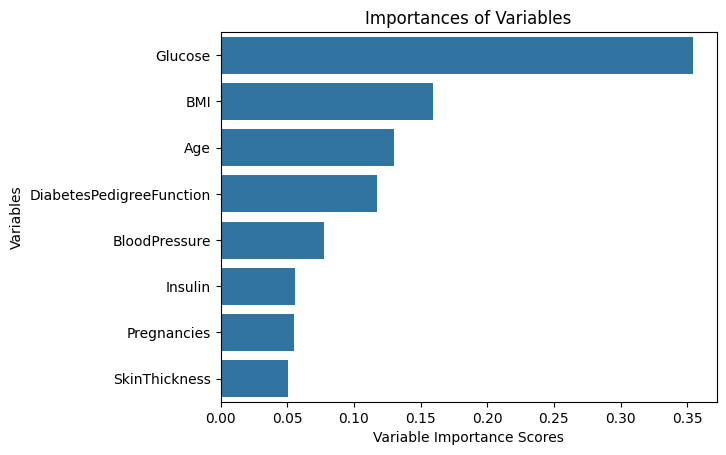

In [317]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                          index=X_train.columns).sort_values(ascending=False)



sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel("Variable Importance Scores")
plt.ylabel("Variables")
plt.title("Importances of Variables")
plt.show()

---
# GRADIENT BOOSTING MACHINES (GBM)
---

In [318]:
Y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.30,
                                                    random_state=42)

# MODEL KURMA & MODEL TAHMİN

In [319]:
gbm_model = GradientBoostingClassifier().fit(X_train,Y_train)
gbm_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [320]:
y_pred = gbm_model.predict(X_test)
print(accuracy_score(Y_test,y_pred))

0.7445887445887446


In [321]:
?gbm_model

Type:        GradientBoostingClassifier
String form: GradientBoostingClassifier()
Length:      100
File:        c:\users\giray\appdata\local\programs\python\python312\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for classification.

This algorithm builds an additive model in a forward stage-wise fashion; it
allows for the optimization of arbitrary differentiable loss functions. In
each stage ``n_classes_`` regression trees are fit on the negative gradient
of the loss function, e.g. binary or multiclass log loss. Binary
classification is a special case where only a single regression tree is
induced.

:class:`~sklearn.ensemble.HistGradientBoostingClassifier` is a much faster variant
of this algorithm for intermediate and large datasets (`n_samples >= 10_000`) and
supports monotonic constraints.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'log_loss', 'exponential'}, default='log_loss'
    The loss function to be optim

# MODEL TUNING

In [322]:
gbm = GradientBoostingClassifier()
gbm_params = {"learning_rate"    : [0.1,0.01,0.001,0.05],
              "n_estimators"     : [100,300,500,1000],
              "max_depth"        : [2,3,5,8]}

gbm_cv_model = GridSearchCV(gbm, gbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,Y_train)

print(gbm_cv_model.best_params_)
print(gbm_cv_model.best_score_)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
0.7764150943396226


In [323]:
#final
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.01,
                                       max_depth=5,
                                       n_estimators=500).fit(X_train,Y_train)

y_pred = gbm_tuned.predict(X_test)
accuracy_score(Y_test,y_pred)

0.7359307359307359

### DEĞİŞKEN ÖNEM DÜZEYİ

In [324]:
gbm_tuned.feature_importances_

array([0.04776535, 0.38531827, 0.0592555 , 0.02240199, 0.06318982,
       0.16124592, 0.11757776, 0.14324539])

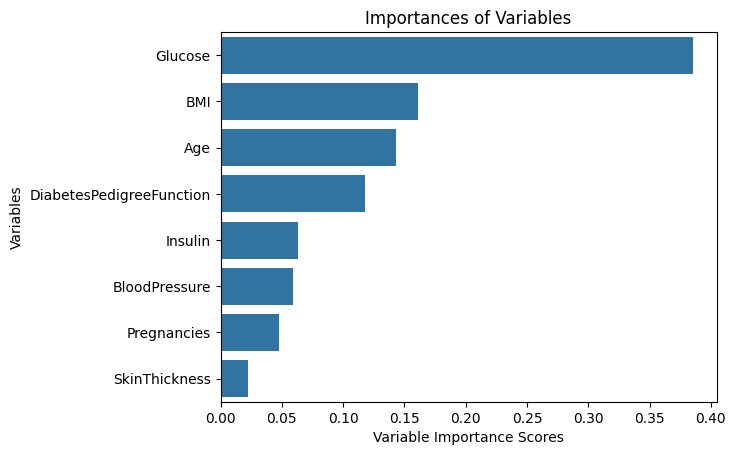

In [325]:
feature_imp = pd.Series(gbm_tuned.feature_importances_,
                          index=X_train.columns).sort_values(ascending=False)



sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel("Variable Importance Scores")
plt.ylabel("Variables")
plt.title("Importances of Variables")
plt.show()

---
# XGBoost (eXtreme Gradient Boosting)
---

In [326]:
Y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.30,
                                                    random_state=42)

# MODEL KURMA & MODEL TAHMİN

In [327]:
xgb_model = XGBClassifier().fit(X_train,Y_train)
xgb_model.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [328]:
y_pred = xgb_model.predict(X_test)
print(accuracy_score(Y_test,y_pred))

0.7272727272727273


In [329]:
?xgb_model

Type:        XGBClassifier
String form:
XGBClassifier(base_score=None, booster=None, callbacks=None,
           colsample_bylevel=None <...> ne, n_estimators=None, n_jobs=None,
           num_parallel_tree=None, random_state=None, ...)
File:        c:\users\giray\appdata\local\programs\python\python312\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.
See :doc:`/python/sklearn_estimator` for more information.

Parameters
----------

    n_estimators : Optional[int]
        Number of boosting rounds.

    max_depth :  typing.Optional[int]

        Maximum tree depth for base learners.

    max_leaves : typing.Optional[int]

        Maximum number of leaves; 0 indicates no limit.

    max_bin : typing.Optional[int]

        If using histogram-based algorithm, maximum number of bins per feature

    grow_policy : typing.Optional[str]

        Tree growing policy.

        - depthwise: Favors splitting at nodes closest to t

# MODEL TUNING

In [330]:
xgb = XGBClassifier()
xgb_params = {"n_estimators"     : [100,500,1000],
              "subsample"        : [0.6,0.8,1],
              "max_depth"        : [3,5,7],
              "learning_rate"    : [0.1,0.001,0.01]}

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,Y_train)

print(xgb_cv_model.best_params_)
print(xgb_cv_model.best_score_)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.6}
0.7744933612858141


In [331]:
#final
xgb_tuned = XGBClassifier(max_depth     = 7,
                          learning_rate = 0.01,
                          n_estimators  = 100,
                          subsample     = 0.6).fit(X_train,Y_train)

y_pred = xgb_tuned.predict(X_test)
accuracy_score(Y_test,y_pred)

0.7489177489177489

### DEĞİŞKEN ÖNEM DÜZEYİ

In [332]:
xgb_tuned.feature_importances_

array([0.07380819, 0.33537453, 0.07554679, 0.06113265, 0.08231513,
       0.14837812, 0.07493293, 0.14851163], dtype=float32)

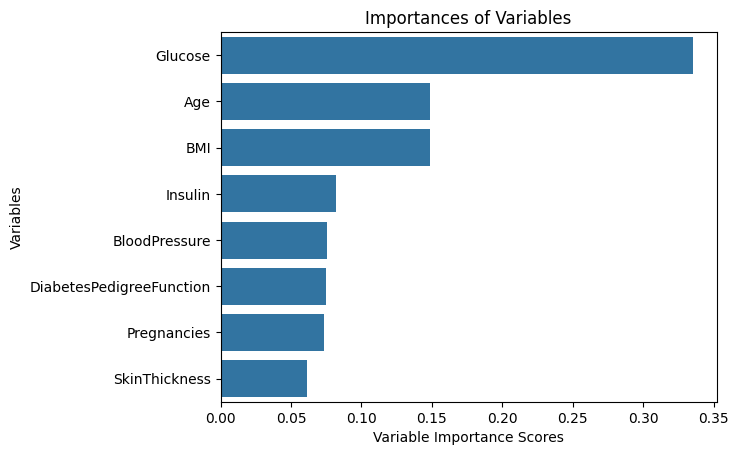

In [333]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                          index=X_train.columns).sort_values(ascending=False)



sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel("Variable Importance Scores")
plt.ylabel("Variables")
plt.title("Importances of Variables")
plt.show()

---
# Light GBM
---

In [334]:
Y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.30,
                                                    random_state=42)

# MODEL KURMA & MODEL TAHMİN

In [335]:
lgbm_model = LGBMClassifier().fit(X_train,Y_train)
lgbm_model.get_params()

[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [336]:
y_pred = lgbm_model.predict(X_test)
print(accuracy_score(Y_test,y_pred))

0.7229437229437229


# MODEL TUNING

In [337]:
lgbm = LGBMClassifier()
lgbm_params = {"learning_rate"    : [0.001,0.01,0.1],
               "n_estimators"     : [200,500,100],
               "max_depth"        : [1,2,35,8]}

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,Y_train)

print(lgbm_cv_model.best_params_)
print(lgbm_cv_model.best_score_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [338]:
#final
lgbm_tuned = LGBMClassifier(max_depth     =1,
                            learning_rate =0.01,
                            n_estimators  =500).fit(X_train,Y_train)

y_pred = lgbm_tuned.predict(X_test)
accuracy_score(Y_test,y_pred)

[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

0.7575757575757576

### DEĞİŞKEN ÖNEM DÜZEYİ

In [339]:
lgbm_tuned.feature_importances_

array([  0, 226,   0,   0,   0, 134,  24, 116])

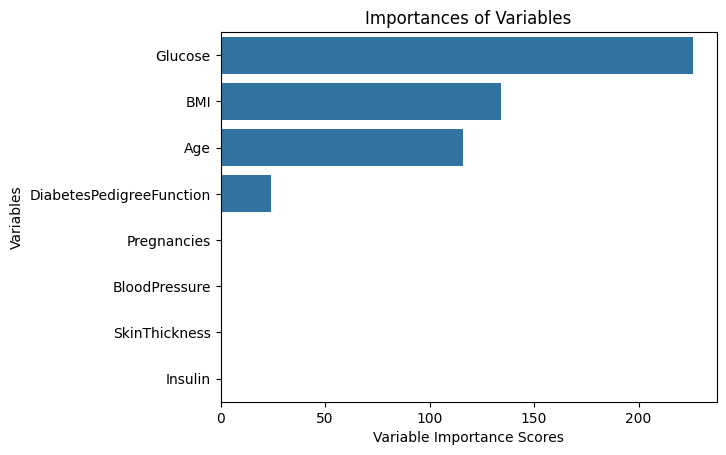

In [340]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_,
                          index=X_train.columns).sort_values(ascending=False)



sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel("Variable Importance Scores")
plt.ylabel("Variables")
plt.title("Importances of Variables")
plt.show()

---
# CATBoost
https://catboost.ai/

---

In [341]:
Y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.30,
                                                    random_state=42)

# MODEL KURMA & MODEL TAHMİN

In [342]:
catb_model = CatBoostClassifier().fit(X_train,Y_train)
catb_model.get_params()

Learning rate set to 0.0079
0:	learn: 0.6879744	total: 2.05ms	remaining: 2.05s
1:	learn: 0.6843414	total: 3.69ms	remaining: 1.84s
2:	learn: 0.6805760	total: 5.23ms	remaining: 1.74s
3:	learn: 0.6765782	total: 6.78ms	remaining: 1.69s
4:	learn: 0.6720829	total: 8.32ms	remaining: 1.66s
5:	learn: 0.6681617	total: 9.92ms	remaining: 1.64s
6:	learn: 0.6641912	total: 11.4ms	remaining: 1.62s
7:	learn: 0.6602881	total: 13.1ms	remaining: 1.63s
8:	learn: 0.6562626	total: 14.7ms	remaining: 1.61s
9:	learn: 0.6528483	total: 16.2ms	remaining: 1.61s
10:	learn: 0.6487823	total: 17.8ms	remaining: 1.6s
11:	learn: 0.6454980	total: 19.2ms	remaining: 1.58s
12:	learn: 0.6418953	total: 20.6ms	remaining: 1.56s
13:	learn: 0.6374431	total: 22ms	remaining: 1.55s
14:	learn: 0.6339676	total: 23.5ms	remaining: 1.54s
15:	learn: 0.6304252	total: 25.1ms	remaining: 1.54s
16:	learn: 0.6266998	total: 26.4ms	remaining: 1.53s
17:	learn: 0.6237660	total: 27.8ms	remaining: 1.51s
18:	learn: 0.6204394	total: 29.3ms	remaining: 1.5

{}

In [343]:
y_pred = catb_model.predict(X_test)
print(accuracy_score(Y_test,y_pred))

0.7402597402597403


# MODEL TUNING

In [344]:
catb = CatBoostClassifier()
catb_params = {"iterations"       : [200,500,100],
               "learning_rate"    : [0.01,0.03,0.1],
               "depth"        : [4,5,8]}

catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs=-1, verbose=2).fit(X_train,Y_train)

print(catb_cv_model.best_params_)
print(catb_cv_model.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
0:	learn: 0.6863312	total: 3.16ms	remaining: 629ms
1:	learn: 0.6811157	total: 5.96ms	remaining: 590ms
2:	learn: 0.6752970	total: 8.58ms	remaining: 563ms
3:	learn: 0.6697432	total: 11.1ms	remaining: 543ms
4:	learn: 0.6641758	total: 13.7ms	remaining: 536ms
5:	learn: 0.6576656	total: 16.3ms	remaining: 526ms
6:	learn: 0.6521870	total: 18.8ms	remaining: 518ms
7:	learn: 0.6465564	total: 21.5ms	remaining: 515ms
8:	learn: 0.6407595	total: 24.1ms	remaining: 511ms
9:	learn: 0.6357725	total: 26.8ms	remaining: 509ms
10:	learn: 0.6299942	total: 29.3ms	remaining: 504ms
11:	learn: 0.6240480	total: 32ms	remaining: 502ms
12:	learn: 0.6196095	total: 34.5ms	remaining: 497ms
13:	learn: 0.6148715	total: 37.3ms	remaining: 496ms
14:	learn: 0.6092626	total: 40ms	remaining: 494ms
15:	learn: 0.6046764	total: 42.6ms	remaining: 490ms
16:	learn: 0.6012725	total: 45.2ms	remaining: 486ms
17:	learn: 0.5958121	total: 47.6ms	remaining: 482ms
18:	learn: 0.590

In [345]:
#final
catb_tuned = CatBoostClassifier(depth=8,
                                iterations=200,
                                learning_rate=0.01).fit(X_train,Y_train)

y_pred = catb_tuned.predict(X_test)
accuracy_score(Y_test,y_pred)

0:	learn: 0.6863312	total: 3.35ms	remaining: 667ms
1:	learn: 0.6811157	total: 6.59ms	remaining: 652ms
2:	learn: 0.6752970	total: 9.9ms	remaining: 650ms
3:	learn: 0.6697432	total: 13.6ms	remaining: 664ms
4:	learn: 0.6641758	total: 17.1ms	remaining: 669ms
5:	learn: 0.6576656	total: 20.2ms	remaining: 655ms
6:	learn: 0.6521870	total: 23.6ms	remaining: 649ms
7:	learn: 0.6465564	total: 26.1ms	remaining: 625ms
8:	learn: 0.6407595	total: 28.9ms	remaining: 612ms
9:	learn: 0.6357725	total: 31.3ms	remaining: 595ms
10:	learn: 0.6299942	total: 33.9ms	remaining: 583ms
11:	learn: 0.6240480	total: 36.4ms	remaining: 571ms
12:	learn: 0.6196095	total: 39ms	remaining: 560ms
13:	learn: 0.6148715	total: 41.6ms	remaining: 553ms
14:	learn: 0.6092626	total: 44ms	remaining: 543ms
15:	learn: 0.6046764	total: 46.9ms	remaining: 539ms
16:	learn: 0.6012725	total: 49.4ms	remaining: 532ms
17:	learn: 0.5958121	total: 52.2ms	remaining: 528ms
18:	learn: 0.5903243	total: 54.6ms	remaining: 520ms
19:	learn: 0.5866024	total:

0.7532467532467533

### DEĞİŞKEN ÖNEM DÜZEYİ

In [346]:
catb_tuned.feature_importances_

array([ 7.62917516, 26.68442452,  7.50666367,  7.44947991,  7.44676888,
       17.24650178, 10.76879002, 15.26819607])

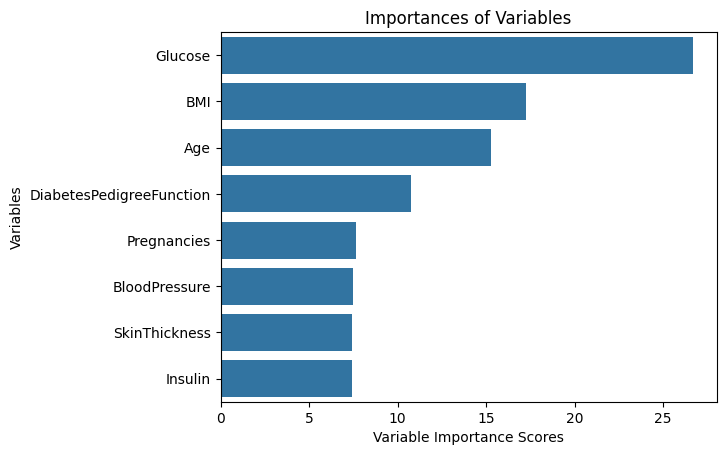

In [347]:
feature_imp = pd.Series(catb_tuned.feature_importances_,
                          index=X_train.columns).sort_values(ascending=False)



sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel("Variable Importance Scores")
plt.ylabel("Variables")
plt.title("Importances of Variables")
plt.show()

---
# TÜM MODELLERİN KARŞILAŞTIRILMASI
---

In [348]:
models = [
    knn_tuned,
    loj_model,
    svm_tuned,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
]

sonuc    = []
sonuclar = pd.DataFrame(columns=["Modeller", "Accuracy"])

for model in models:
    isimler  = model.__class__.__name__
    y_pred   = model.predict(X_test)
    dogruluk = accuracy_score(Y_test, y_pred)
    sonuc    = pd.DataFrame([[isimler, dogruluk*100]], columns = ["Modeller","Accuracy"])
    sonuclar = pd.concat([sonuclar, sonuc], ignore_index=True)


c:\Users\Giray\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


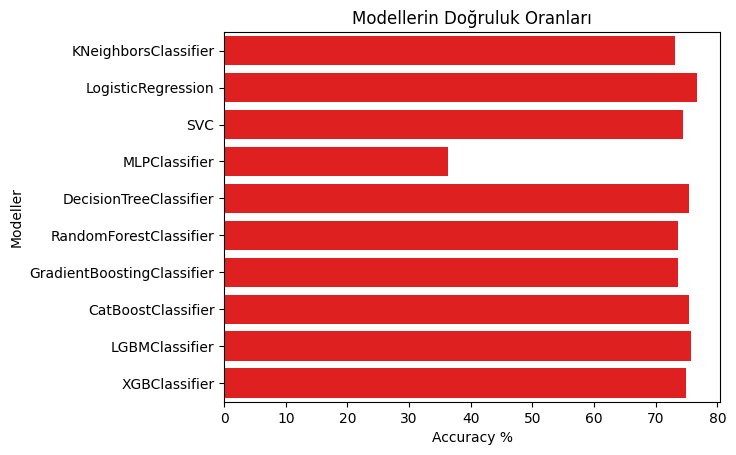

In [349]:
sns.barplot(x     = "Accuracy", 
            y     = "Modeller",
            data  = sonuclar,
            color = "r")
plt.xlabel("Accuracy %")
plt.title("Modellerin Doğruluk Oranları");
# MLP düşük çıktı çünkü standaartlaştıma yapılmış 
# modelde standartlaştırılma yapılmamış veri kullanıldı.

In [350]:
# tüm mlp modellerini eklersek;
Y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.30,
                                                    random_state=42)

#final #aktivasyon fonksiyonu: relu
mlpc_tuned_activision_relu = MLPClassifier(alpha               = 5, 
                                           hidden_layer_sizes  = (3,5), 
                                           solver              = "lbfgs",
                                           activation          = "relu").fit(X_train,Y_train)
y_pred = mlpc_tuned_activision_relu.predict(X_test)
print("activision: relu", accuracy_score(Y_test,y_pred))
####

isimler  = "MLPClassifier (Activation: relu)"
y_pred   = mlpc_tuned_activision_relu.predict(X_test)
dogruluk = accuracy_score(Y_test, y_pred)
sonuc    = pd.DataFrame([[isimler, dogruluk*100]], columns = ["Modeller","Accuracy"])
sonuclar = pd.concat([sonuclar, sonuc], ignore_index=True)

####
#final #aktivasyon fonksiyonu: logistic
mlpc_tuned_activision_logistic = MLPClassifier( alpha              = 5, 
                                                hidden_layer_sizes = (100,100), 
                                                solver             = "lbfgs",
                                                activation         = "logistic").fit(X_train,Y_train)

y_pred = mlpc_tuned_activision_logistic.predict(X_test)
print("activision: logistic", accuracy_score(Y_test,y_pred))
####

isimler  = "MLPClassifier (Activation: logistic)"
y_pred   = mlpc_tuned_activision_logistic.predict(X_test)
dogruluk = accuracy_score(Y_test, y_pred)
sonuc    = pd.DataFrame([[isimler, dogruluk*100]], columns = ["Modeller","Accuracy"])
sonuclar = pd.concat([sonuclar, sonuc], ignore_index=True)

####
# Standartlaştırarak yapmak:

Y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.30,
                                                    random_state=42)
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)


#final #aktivasyon fonksiyonu: logistic # scale edilmiş
mlpc_tuned_activision_logistic_standardized = MLPClassifier( alpha              = 1, 
                            hidden_layer_sizes = (3,5), 
                            solver             = "lbfgs",
                            activation         = "logistic").fit(X_train,Y_train)

y_pred = mlpc_tuned_activision_logistic_standardized.predict(X_test)
print("activision: logistic, scaled=true", accuracy_score(Y_test,y_pred))
####

isimler  = "MLPClassifier (Activation: logistic, Scaled=True)"
y_pred   = mlpc_tuned_activision_logistic_standardized.predict(X_test)
dogruluk = accuracy_score(Y_test, y_pred)
sonuc    = pd.DataFrame([[isimler, dogruluk*100]], columns = ["Modeller","Accuracy"])
sonuclar = pd.concat([sonuclar, sonuc], ignore_index=True)

####


c:\Users\Giray\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


activision: relu 0.6883116883116883
activision: logistic 0.7489177489177489
activision: logistic, scaled=true 0.7575757575757576


c:\Users\Giray\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


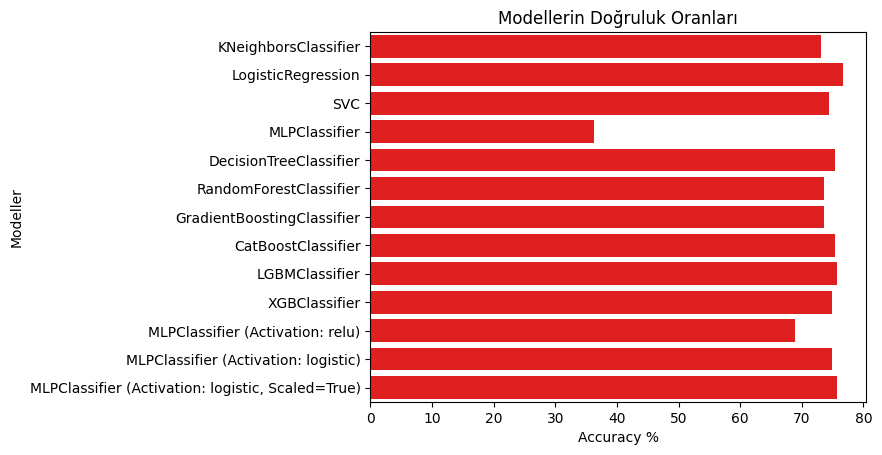

In [351]:
sns.barplot(x     = "Accuracy", 
            y     = "Modeller",
            data  = sonuclar,
            color = "r")
plt.xlabel("Accuracy %")
plt.title("Modellerin Doğruluk Oranları");

In [352]:
sonuclar

,Modeller,Accuracy
0,KNeighborsClassifier,73.160173
1,LogisticRegression,76.623377
2,SVC,74.458874
3,MLPClassifier,36.363636
4,DecisionTreeClassifier,75.324675
5,RandomForestClassifier,73.593074
6,GradientBoostingClassifier,73.593074
7,CatBoostClassifier,75.324675
8,LGBMClassifier,75.757576
9,XGBClassifier,74.891775


## Daha Başka Ne Yapılabilir?
1. Değişken türetme / değişken mühendisliği 
* * boy ve kilodan boy kütle indexi oluştumek
2. Değişken seçme
* * Her zaman 100'lerce değişken seçmek iyi değildir.
3. Otomatik ML  kütüphaneleri ve yaklaşımları kullanarak inceleme. 
4. Model Deployment
* * Model sonuçlarının gönderilmesi; excele dönüştürüp göndermek veya sisteme entegre etmek